# Computational methods in Physics
## Week 3
#### Prof. Michael Wood-Vasey
##### [based on materials from Prof. Brian D'Urso]
##### University of Pittsburgh, Department of Physics and Astronomy

## Random Numbers

### Deterministic Randomness
Some problems are physically unpredictable. Examples:
  * thermal motion
  * games of chance
  * radioactive decay

How do we deal with randomness numerically?
  * Computers are deterministic; no chance involved.
  * Always same output for same input; unless hardware error.
  * Generate pseudo-random numbers.
  
Monte Carlo calculations: simulate random events.
  * Solve equations statistically
  * Solve intractable problems

### Drawing Random Numbers
  * Python has a random module for drawing random numbers
  * `random.random()` draws random numbers in `[0, 1)` :  

In [35]:
import random 

In [36]:
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [41]:
random.random()

0.37314316199120035

In [42]:
random.random()  

0.7225804702953376

In [43]:
random.random()

0.9863691538857358

In [44]:
[random.random() for i in range(10)]

[0.451502960567976,
 0.9339710674906362,
 0.924059436730153,
 0.04034346018637547,
 0.4917288063196501,
 0.5928789817332918,
 0.09606744546454482,
 0.5564895172881258,
 0.9714023594754505,
 0.732155107408455]

  * The sequence of random numbers is produced by a deterministic algorithm - the numbers just appear random.

### Distributions of Random Numbers
  * `random.random()` generates random numbers that are uniformly
distributed in the interval $[0, 1)$.
  * `random.uniform(a, b)` generates random numbers uniformly
distributed in $[a, b)$.
  * "Uniformly distributed" means that if we generate a large set
of numbers, no part of $[a, b)$ gets more numbers than others.
  * See `random_distribution` demo.

### Vectorized Drawing of Random Numbers
  * `random.random()` generates one number at a time

In [45]:
random.random() # one number  

0.513089412173477

In [47]:
random.uniform(-100, 10) # one number    

-46.075876850491014

  * `numpy` has a random module that efficiently generates a (large)
number of random numbers at a time:  

In [54]:
import numpy as np
r = np.random.random(size=1000) # array
r = np.random.uniform(-1, 10, size=1000) # array

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  98.,   85.,  110.,   97.,  124.,   88.,  104.,  101.,  100.,   93.]),
 array([-0.99302548,  0.10434511,  1.2017157 ,  2.29908629,  3.39645688,
         4.49382747,  5.59119807,  6.68856866,  7.78593925,  8.88330984,
         9.98068043]),
 <a list of 1 Patch objects>)

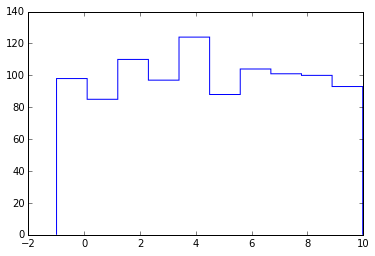

In [57]:
plt.hist(r, histtype='step')

In [59]:
r[np.argsort(r)]

array([-0.99302548, -0.98761579, -0.9602745 , -0.9504779 , -0.94450209,
       -0.93288549, -0.93129153, -0.93044691, -0.92091803, -0.91877624,
       -0.90329292, -0.89441737, -0.88126331, -0.87417934, -0.87031556,
       -0.8622009 , -0.86037184, -0.83505392, -0.82326597, -0.81464077,
       -0.80345092, -0.78893974, -0.76613161, -0.75548421, -0.75131649,
       -0.72850547, -0.64359718, -0.63908161, -0.63461537, -0.61539378,
       -0.60177248, -0.59582897, -0.59176409, -0.58469372, -0.56681861,
       -0.53118404, -0.52476354, -0.5193742 , -0.50592642, -0.49907395,
       -0.49630181, -0.49432204, -0.49024554, -0.47831178, -0.47488964,
       -0.42993944, -0.42489313, -0.41651328, -0.41219473, -0.40360417,
       -0.40329467, -0.40243511, -0.39000204, -0.38664694, -0.36382394,
       -0.33409915, -0.31499019, -0.31497072, -0.29898558, -0.24197389,
       -0.23036803, -0.22842294, -0.2185465 , -0.21137609, -0.19478051,
       -0.18556998, -0.18215362, -0.17657992, -0.17101128, -0.16

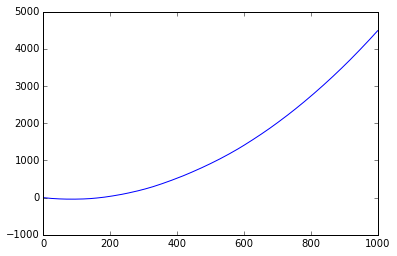

In [61]:
cs = np.cumsum(r[np.argsort(r)])
plt.plot(cs)

  * Vectorized calculations are important for speeding up programs!

### Drawing Integers
  * Quite often we want to draw an integer from $[a, b]$ and not a
real number.
  * Python's `random` module and `numpy.random` have functions for
drawing uniformly distributed integers:

In [64]:
(a, b) = (-1, 10)
import random  
r = random.randint(a, b) # a, a+1, ..., b

In [65]:
print(r)

2


In [67]:
N = 100
import numpy as np  
r = np.random.randint(a, b+1, N)  # b+1 is not included  
r = np.random.random_integers(a, b, N)  # b is included  

In [71]:
np.sum(np.random.random_integers(0, 1, 10000))

5030

### Example: Throwing a Die; Vectorized Version

In [89]:
 import numpy as np  
 N = 10   
 eyes = np.random.randint(1, 6+1, N)  
print(eyes)
print(eyes == 6)
success = (eyes == 6)
print(success)
 
 # True/False array   
 success = eyes == 6   
 # treats True as 1, False as 0   
 num_six = np.sum(success)   
 print('Got six %d times out of %d' % (num_six, N)) 

[5 6 2 3 4 3 5 6 2 2]
[False  True False False False False False  True False False]
[False  True False False False False False  True False False]
Got six 2 times out of 10


  * Important: use `numpy.sum` and not the default `sum` function! (The latter is slow.)

### Fixing the Seed Fixes the Random Sequence
  * Debugging programs with random numbers is difficult because
the numbers produced vary each time we run the program.
  * For debugging it is important that a new run reproduces the
sequence of random numbers in the last run.
  * This is possible by fixing the seed of the random module:  
`random.seed(121) # int argument`
  * Or the numpy module:
`np.random.seed(121) # int argument`
  * The value of the seed determines the random sequence:

In [104]:
import numpy as np   
print(np.random.seed(2))
print(np.random.random(3))

print(np.random.seed(2))
print(np.random.random(3))

None
[ 0.4359949   0.02592623  0.54966248]
None
[ 0.4359949   0.02592623  0.54966248]


### Distributions of Random Numbers
  * Sometimes we want uniformly distributed random numbers,
and sometimes not.
  * Example: it is more likely have normal (mean) blood pressure
than large deviations from the mean.
  * We can use the Gaussian (or "normal") distribution to get random
numbers clustered around a mean value `m` with a std deviation `s`:  

In [108]:
m, s = 50, 15
import random   
r = random.normalvariate(m, s)
print(r)

43.20908995946115


  * Vectorized drawing of $N$ Gaussian/normal numbers:  

(array([  7.,  13.,  24.,  11.,  28.,   9.,   4.,   2.,   1.,   1.]),
 array([  18.76022096,   28.0472378 ,   37.33425464,   46.62127148,
          55.90828832,   65.19530516,   74.482322  ,   83.76933884,
          93.05635568,  102.34337252,  111.63038936]),
 <a list of 1 Patch objects>)

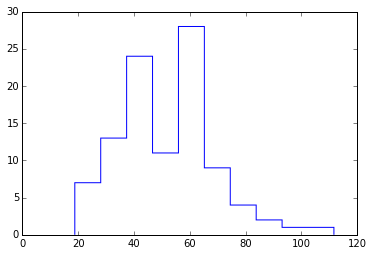

In [123]:
(m, s, N) = (50, 15, 100)
import numpy as np   
samples = np.random.normal(m, s, N) 
# print(samples)
plt.hist(samples, histtype='step')

### Probability via Monte Carlo Simulation
  * What is the probability that a certain event A happens?
    1. Simulate $N$ events
    2. Count how many times $M$ the event $A$ happens
    3. The probability of the event $A$ is then $M/N$ (as $N \rightarrow \infty$).
  * Example: what is the probability of getting 6 on two or more
dice if we throw 4 dice?  

In [ ]:
 N = 1000 # number of experiments   
 M = 0 # number of successful events   

def count_six():
     six = 0
     dice_1 = random.randint(1, 6)   
     dice_2 = random.randint(1, 6)   
     dice_3 = random.randint(1, 6)   
     dice_4 = random.randint(1, 6)   

     if dice_1 == 6: six += 1   
     if dice_2 == 6: six += 1   
     if dice_3 == 6: six += 1   
     if dice_4 == 6: six += 1   
    
     return six

In [149]:
count_six()

0

In [145]:
    
for i in range(N):   
     # successful event?   
     if count_six() >= 2:   
         M += 1 
        
print('probability of getting 6 on two or more dice out of 4 dice is:')
print('%f based on %d trials' % (float(M)/N, N))

probability of getting 6 on two or more dice out of 4 dice is:
0.138000 based on 1000 trials


## Random Walks

### Random Walk in One Spatial Dimension
  * A particle moves to the left and right with equal probability
  * $n$ particles start at $x = 0$ at time $t = 0$ - how do the particles
get distributed over time?
  * This is called a random walk and constitutes a simple model for
molecular motion in many situations:
    - heat transport
    - quantum mechanics
    - polymer chains
    - population genetics
    - pricing of financial instruments
    - ...
  * We'll make a program for simulating random walk.

### Random Walk as a Difference Equation
  * Let $x_n$ be the position of one particle at time $n$.
  * Updating rule: $x_{n+1} = x_n + s$  
where $s = 1$ or $s = -1$, both with probability $1/2$.
  * For $n_p$ particles, we need $n_p$ such difference equations.
  * Would like to calculate the statistics (mean position, "width" of the cluster of particles, how particles are distributed throughout space).
  * Random walk in 2-D:
    - $x_{n+1} = x_n + r_x$
    - $y_{n+1} = y_n + r_y$
    - $r_x = r \cos\theta$, $r_y = r \sin\theta$, with random $\theta$

### How Far After $N$ Steps (in 2-D)?
  * Start at $(x, y) = (0, 0)$.
  * After $N$ steps:  
$R^2 = (\Delta x_1 + \cdots + \Delta x_N)^2 + (\Delta y_1 + \cdots + \Delta y_N)^2$
  * Expand:  
$R^2 = \Delta x_1^2 + \cdots + \Delta x_N^2 + 2 \Delta x_1 \Delta x_2 + \cdots  
+ \Delta y_1^2 + \cdots + \Delta y_N^2 + 2 \Delta y_1 \Delta y_2 + \cdots$
  * Cross terms average to zero:  
$R^2 \simeq \Delta x_1^2 + \cdots + \Delta x_N^2 + \Delta y_1^2 + \cdots + \Delta y_N^2$
  * $\Rightarrow R^2 \simeq N \langle r^2 \rangle$
  * $\Rightarrow R \simeq \sqrt{N} r_{RMS}$

## Radioactive Decay
### Spontaneous (e.g. Radioactive) Decay
  * "Spontaneous" process $\rightarrow$ no external stimulus.
  * Time of decay is random, independent of:
    - How long it existed.
    - How many other are around.
  * Describes nuclear decay, electronic relaxation, etc.
  * Theory: probability of decay per $\Delta t$ per particle is:   
$P(t)=\lambda$ (constant)    
$\Rightarrow$ $N(t)$, $dN/dt$ decrease with time.  

### Model: Continuous Decay
  * If $N\rightarrow \infty$, $\Delta t \rightarrow 0$:  
$\frac{\Delta N(t)}{\Delta t} \rightarrow \frac{dN(t)}{dt} = -\lambda N(t)$
  * Can integrate differential equation:  
$N(t) = N(0) e^{-\lambda t} = N(0) e^{-t/\tau}$  
with $\lambda = 1/\tau$
  * $\frac{dN}{dt}(t) = -\lambda N(0) e^{-\lambda t} = \frac{dN}{dt}(0) e^{-t/\tau}$
  * But this is an approximation!  
Nature can have small $N$, stochastic behavior.

### Method: Decay Simulation
  * Algorithm:  
Loop through remaining nuclei   
$r_i < \lambda$? $\Rightarrow$ decays   
$t = t + \Delta t$   
Repeat loop  
  * $r_i$ is random number in $[0, 1]$.
  * Higher $\lambda\Rightarrow$ more frequent decays.